In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')
from pylab import rcParams
rcParams['figure.figsize']=10,6
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
sns.set(style='darkgrid')
pd.pandas.set_option('display.max_columns',None)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\HR analytics\train_LZdllcl.csv")

In [3]:
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

for col in df.columns:
    col_type = df[col].dtype

    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    else:
        df[col] = df[col].astype('category')

end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

Memory usage of dataframe is 5.85 MB
Memory usage after optimization is: 0.94 MB
Decreased by 83.9%


In [4]:
df.shape

(54808, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int32
department              54808 non-null category
region                  54808 non-null category
education               52399 non-null category
gender                  54808 non-null category
recruitment_channel     54808 non-null category
no_of_trainings         54808 non-null int8
age                     54808 non-null int8
previous_year_rating    50684 non-null float16
length_of_service       54808 non-null int8
KPIs_met >80%           54808 non-null int8
awards_won?             54808 non-null int8
avg_training_score      54808 non-null int8
is_promoted             54808 non-null int8
dtypes: category(5), float16(1), int32(1), int8(7)
memory usage: 965.7 KB


In [7]:
print('The number of rows',df.shape[0])
print('The number of columns in dataframe are',df.shape[1])
print('\n Features are \n',df.columns.tolist())

The number of rows 54808
The number of columns in dataframe are 14

 Features are 
 ['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [8]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,5.068400e+04,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,inf,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259766e+00,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000e+00,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000e+00,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000e+00,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000e+00,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000e+00,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [10]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


The total records corresponding to class Zero are : 50140
The total records corresponding to class Ones are : 4668


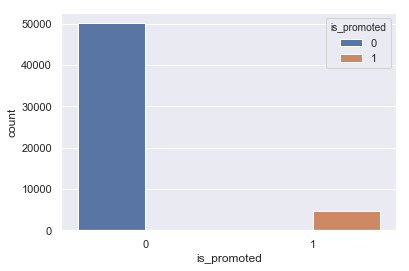

In [11]:
#Foremost important thing is to check the classes in Target column
target='is_promoted'
print('The total records corresponding to class Zero are :',len(df[df[target]==0]))
print('The total records corresponding to class Ones are :',len(df[df[target]==1]))
sns.countplot(df[target],hue=df[target])
#As we see it is completely imbalanced dataset.

In [12]:
#Two ways to treat the imbalanced dataste, 1) Undersampling 2) Oversmapling 
#In undersampling we bring down the no of records equal to minority classes.
#In Oversampling the minority class count is made equal to majority classes.
#In undersampling there will be loss of information, so will go for oversampling.
majority_class=len(df[df[target]==0])
print('The majority class records are',majority_class)
minority_class_indicies=df[df[target]==1].index
print(minority_class_indicies)

The majority class records are 50140
Int64Index([   11,    39,    60,    66,    67,    69,    71,    75,    79,
               84,
            ...
            54695, 54713, 54720, 54722, 54730, 54734, 54757, 54761, 54792,
            54796],
           dtype='int64', length=4668)


In [13]:
minority_indicies=np.random.choice(minority_class_indicies,majority_class)
print(len(minority_indicies))
print(majority_class)

50140
50140


In [14]:
majority_class_indicies=df[df[target]==0].index

In [1562]:
over_sampled_data=np.concatenate(([minority_indicies,majority_class_indicies])) #Arrays should be kept always in paranthesis)
df=df.loc[over_sampled_data]

In [1563]:
df.shape

(100280, 14)

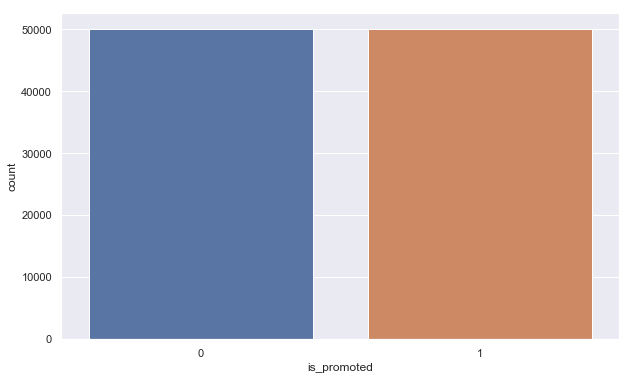

In [1564]:
sns.countplot(target,data=df) #Now we see the counts of both classes are equal.

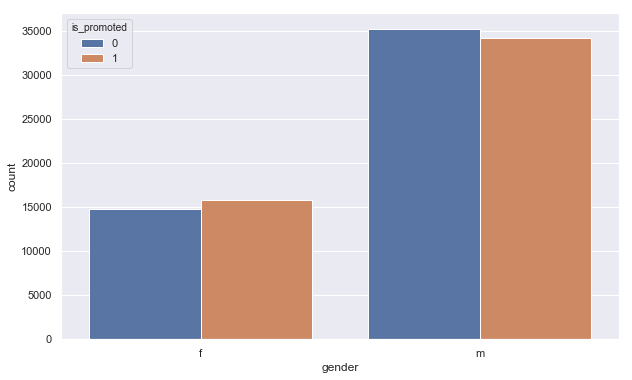

In [1565]:
#Now our dataset is balanced so we can continue our analysis.
sns.countplot(df['gender'],hue=df['is_promoted'])
#Males are more promoted compared to females and also they are not promoted.

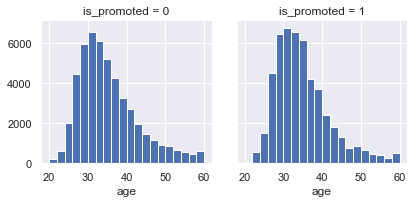

In [1566]:
g=sns.FacetGrid(df,col='is_promoted')
g.map(plt.hist,'age',bins=20)

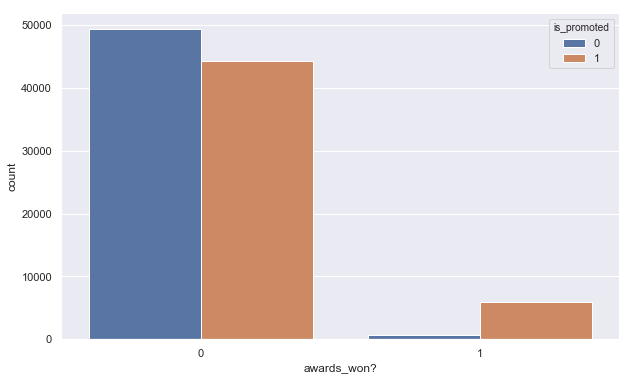

In [1567]:
#Lets see how the awards own people are promoted or not.
sns.countplot(df['awards_won?'],hue=df['is_promoted'])

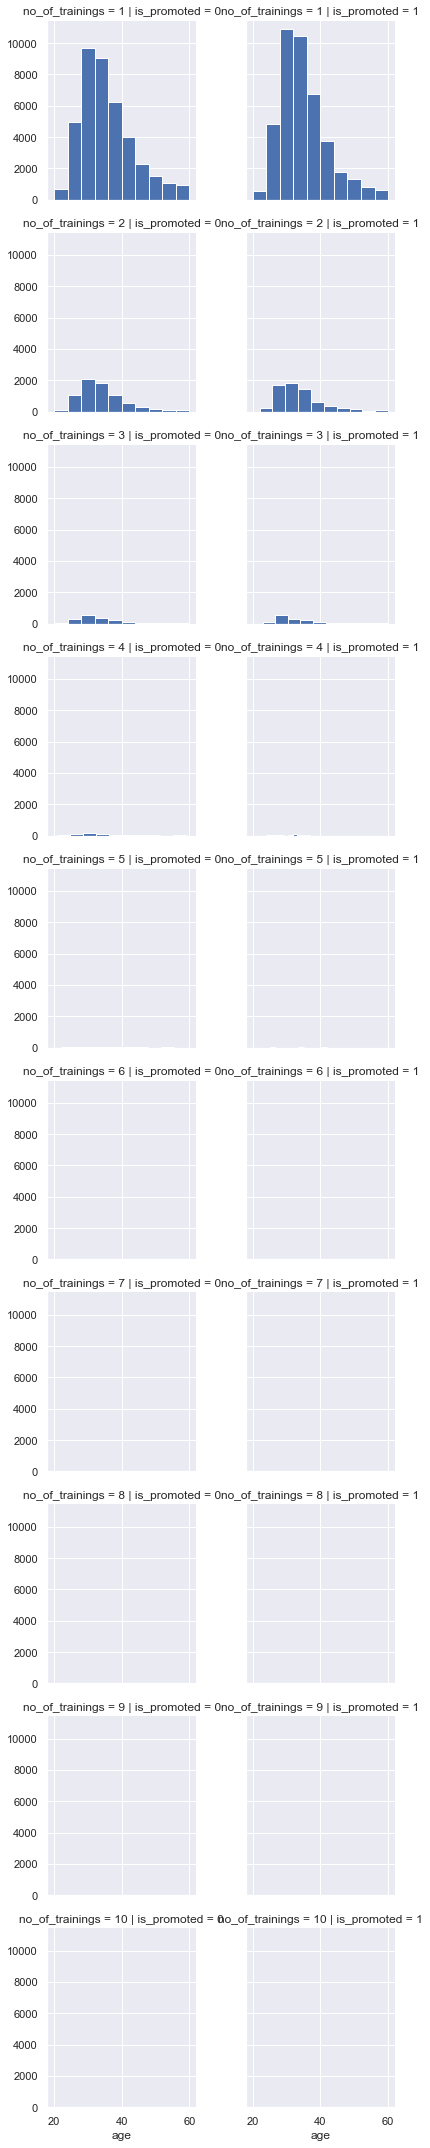

In [1568]:
#Lets vizualize the training attended vs promotion
a=sns.FacetGrid(df,row='no_of_trainings',col='is_promoted')
a.map(plt.hist,'age')

In [1569]:
#Before that lets drop employee_id columns as it does not contribute to our analysis.
df.drop('employee_id',axis=1,inplace=True)

In [1570]:
#Finding Missing values
def nullvalue(df):
    df=df.mask(df==0,0.0001)
    nullvaluecolumns=df.isna().sum()/df.shape[0]*100
    print('The total columns are :',len(nullvaluecolumns))
    drop_cols=nullvaluecolumns[nullvaluecolumns>30]
    print('The columns to be dropped are :', len(drop_cols))
    print(drop_cols)
    df.drop(df[drop_cols],axis=1,inplace=True)
    retained_cols=nullvaluecolumns[nullvaluecolumns<30]
    print('The columns to be retained are :', len(retained_cols))
    print('The retained columns are',retained_cols)
    features_with_nan=[feature for feature in df.columns if df[feature].isna().sum()>=1]
    print('The columns containing Nan values are :',len(features_with_nan))
    print('features_with_nan',features_with_nan)
    features_with_nan_cat=[feature for feature in df.columns if df[feature].isna().sum()>=1 and df[feature].dtypes=='O']
    print('The categorical columns with missing values are',features_with_nan_cat)
    features_with_nan_num=[feature for feature in df.columns if df[feature].isna().sum()>=1 and df[feature].dtypes!='O']
    print('The Numerical columns with missing values are',features_with_nan_num)
    Numerical=[feature for feature in df.columns if df[feature].dtypes!='O']
    print('The Numerical columns are :',Numerical)
    Categorical=[feature for feature in df.columns if df[feature].dtypes=='O']
    print('The Categorical columns are :',Categorical)
    year_feature=[feature for feature in Numerical if 'Yr' in feature or 'Year' in feature]
    print('The year columns are',len(year_feature))
    #Lets print the discrete and continous features in Numerical columns
    Discrete_Numerical=[feature for feature in Numerical if len(df[feature].unique()<25) and feature not in year_feature]
    print('The discrete numerical features are :', len(Discrete_Numerical))
    print('Discrete_Numerical :',Discrete_Numerical)
    Continous_Numerical=[feature for feature in Numerical if feature not in year_feature+Discrete_Numerical]
    print('The continous numerical features are :', len(Continous_Numerical))
    print('Continous_Numerical :',Continous_Numerical)
    return df,drop_cols,retained_cols,features_with_nan,features_with_nan_cat,features_with_nan_num,Numerical,Categorical,year_feature,Discrete_Numerical,Continous_Numerical
                         

In [1571]:
df,drop_cols,retained_cols,features_with_nan,features_with_nan_cat,features_with_nan_num,Numerical,Categorical,year_feature,Discrete_Numerical,Continous_Numerical=nullvalue(df)

The total columns are : 13
The columns to be dropped are : 0
Series([], dtype: float64)
The columns to be retained are : 13
The retained columns are department              0.000000
region                  0.000000
education               3.529118
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.364380
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64
The columns containing Nan values are : 2
features_with_nan ['education', 'previous_year_rating']
The categorical columns with missing values are ['education']
The Numerical columns with missing values are ['previous_year_rating']
The Numerical columns are : ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
The Cat

In [1572]:
df=df.reset_index(drop=True)
df.head(3)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_13,Master's & above,m,other,1,34,3.0,3,1.0,0.0001,49,1.0
1,Technology,region_2,Bachelor's,f,referred,2,37,5.0,4,1.0,1.0000,83,1.0
2,Legal,region_2,Bachelor's,m,sourcing,1,28,2.0,4,1.0,0.0001,60,1.0


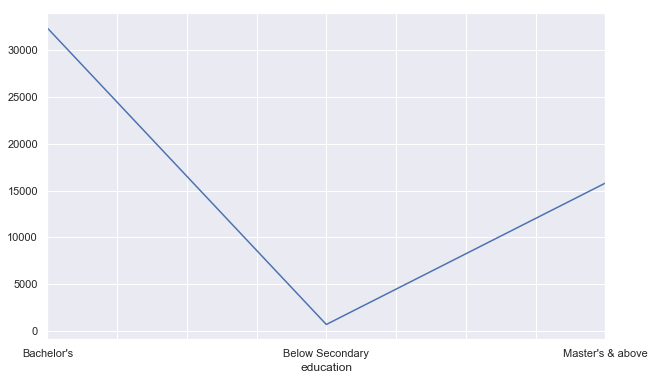

In [1573]:
df.groupby('education')['is_promoted'].sum().plot()
#As the people who as done there bachelors are promoted most, and missing values are 3% so lets replace them by mode.

In [1574]:
#Replace the missing values in eduaction column with most repeated category in the column.
def replacemissingcat(df,features_with_nan_cat):
    for feature in features_with_nan_cat:
        df[feature].fillna(df[feature].value_counts().index[0],inplace=True)
    return df

df=replacemissingcat(df,features_with_nan_cat)

In [1575]:
df.isna().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    7385
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [1576]:
df[features_with_nan_num].nunique()

previous_year_rating    5
dtype: int64

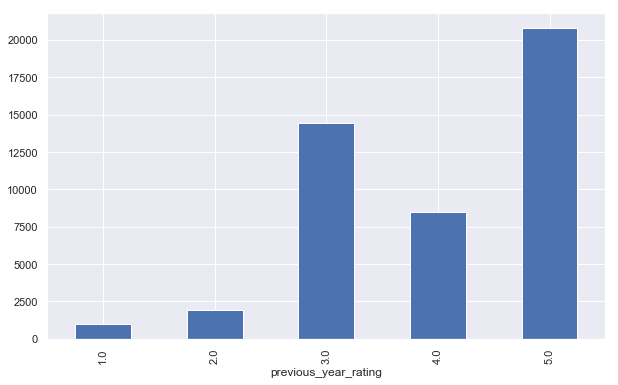

In [1577]:
df.groupby('previous_year_rating')['is_promoted'].sum().plot.bar()

In [1578]:
#Lets replace the missing value sin numerical with median.
def replacenummissing(df,features_with_nan_num):
    for feature in features_with_nan_num:
        data=df.copy()
        data[feature].fillna(data[feature].median(),inplace=True)
    return data
df=replacenummissing(df,features_with_nan_num)

In [1579]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

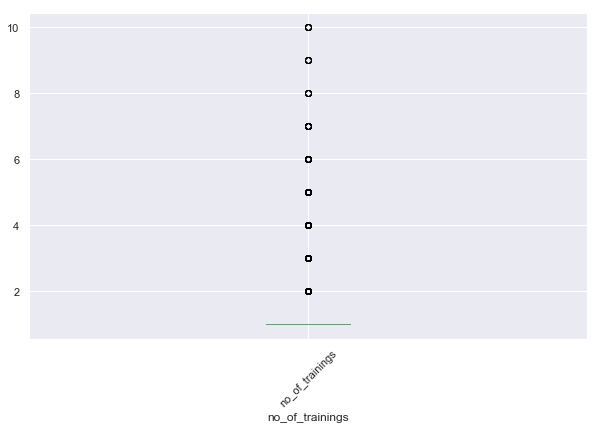

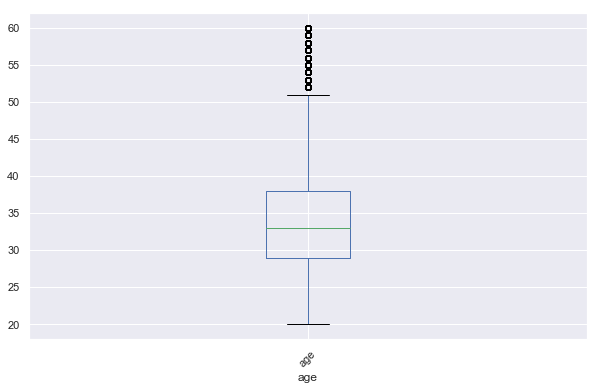

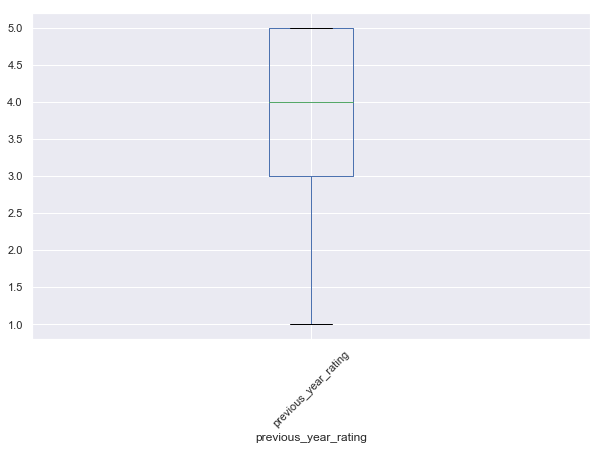

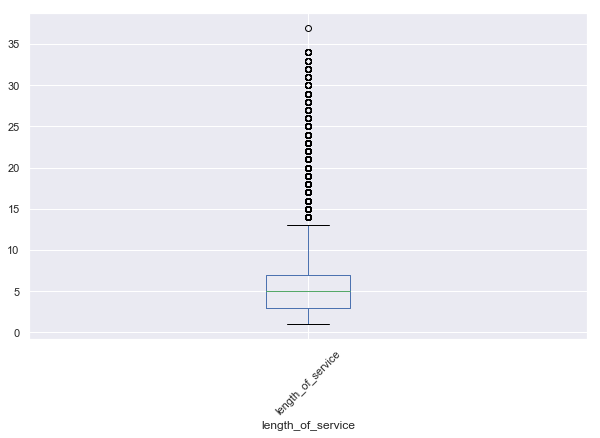

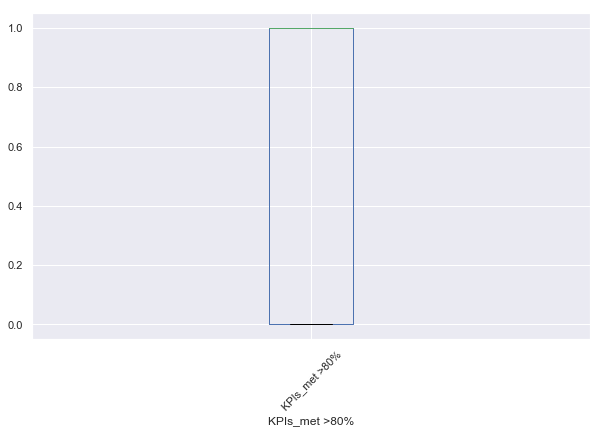

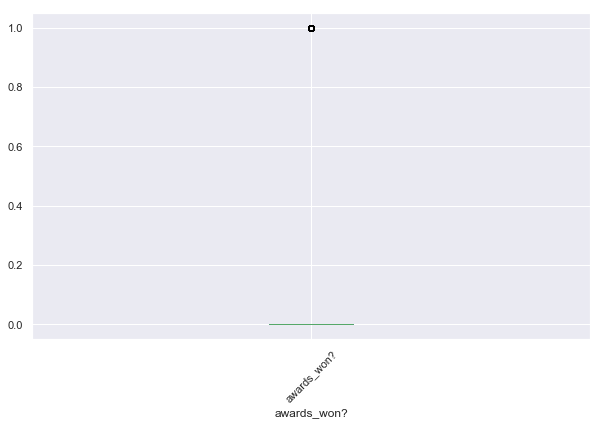

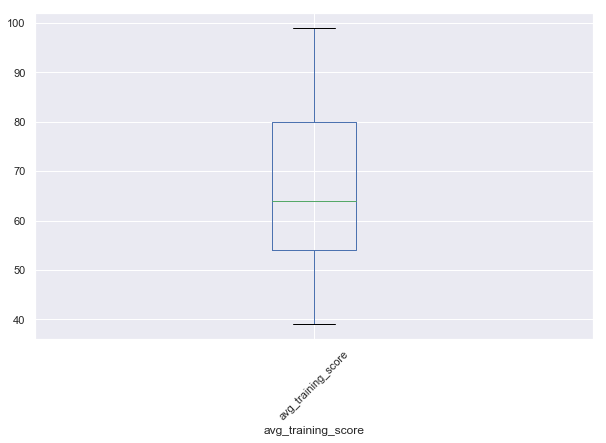

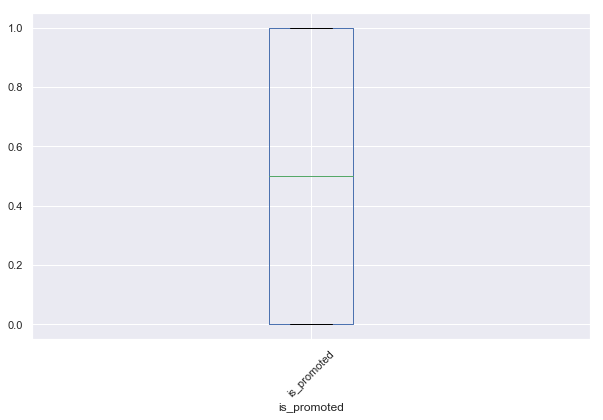

In [1580]:
#lets check for the outliers.
for feature in Numerical:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(feature)
        plt.xticks(rotation=45)
        plt.xlabel(feature)
        plt.show()

In [1581]:
#Lets remove outliers
def outliertreatment(df):
    for feature in df.describe().columns:
        Q1=df.describe().at['25%',feature]
        Q3=df.describe().at['75%',feature]
        IQR=Q3-Q1
        UTV=Q3+1.5*IQR
        LTV=Q1-1.5*IQR
        x=np.array(df[feature])
        p=[]
        for j in x:
            if j<LTV or j>UTV:
                p.append(df[feature].median())
            else:
                p.append(j)
        df[feature]=p

In [1582]:
outliertreatment(df)

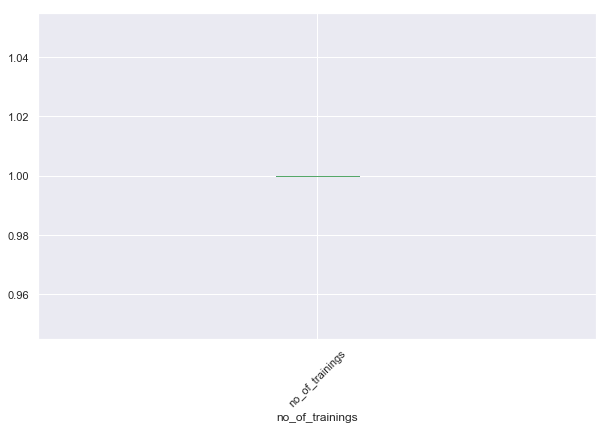

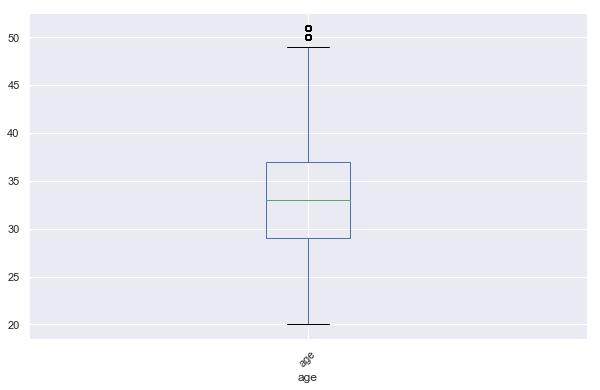

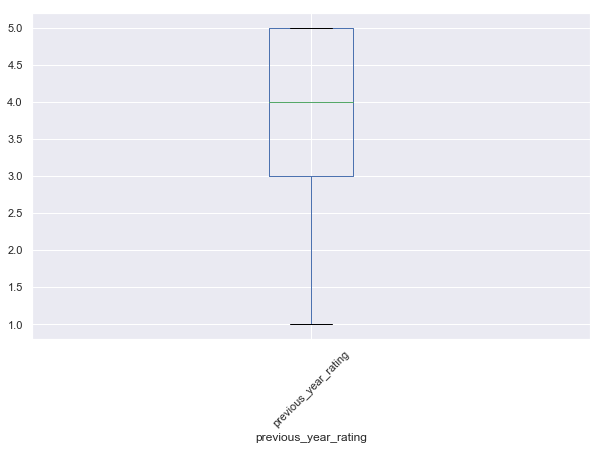

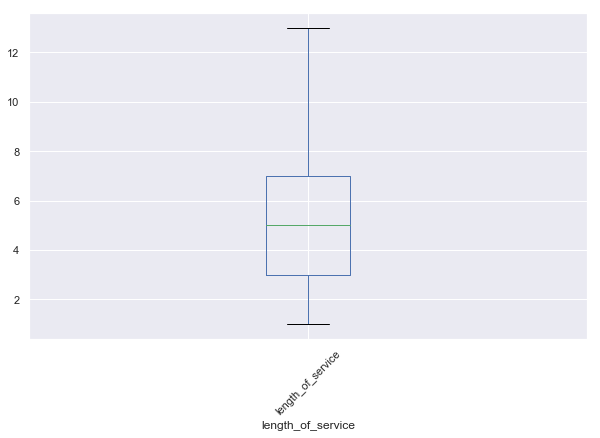

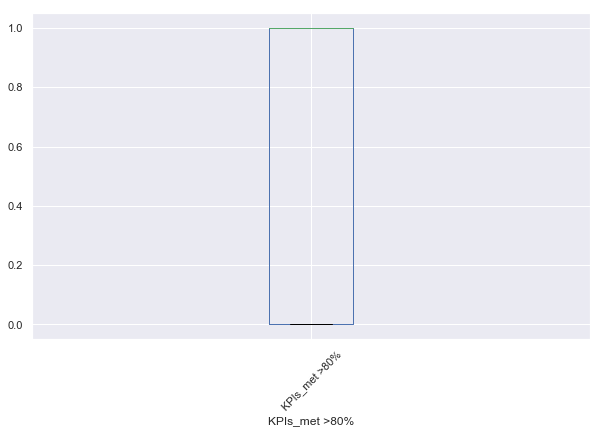

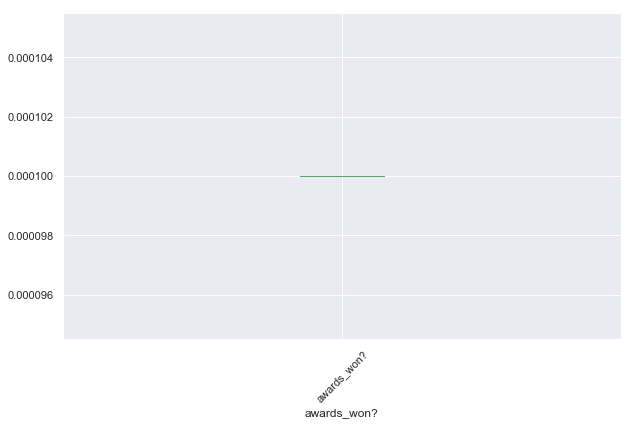

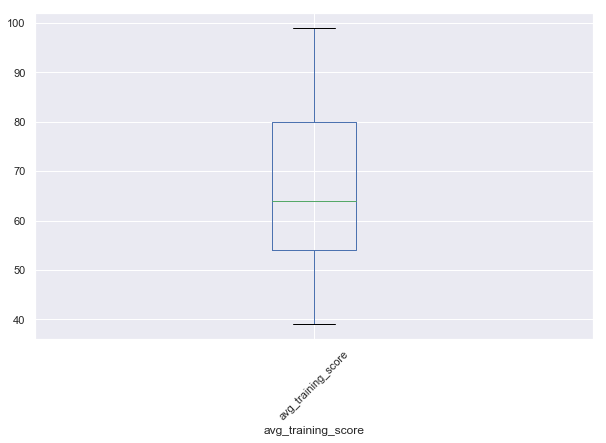

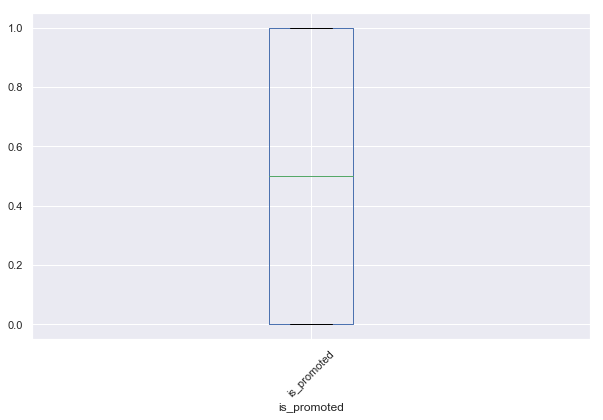

In [1583]:
#lets check for the outliers.
for feature in Numerical:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(feature)
        plt.xticks(rotation=45)
        plt.xlabel(feature)
        plt.show()

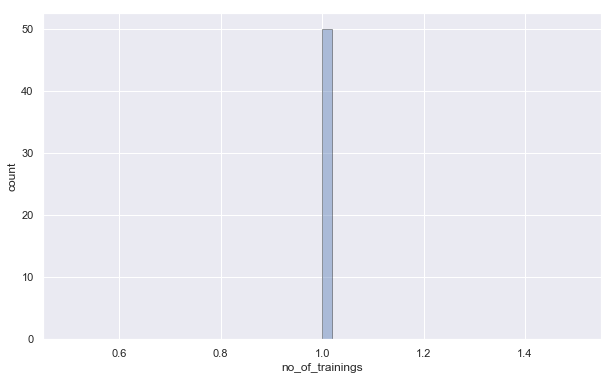

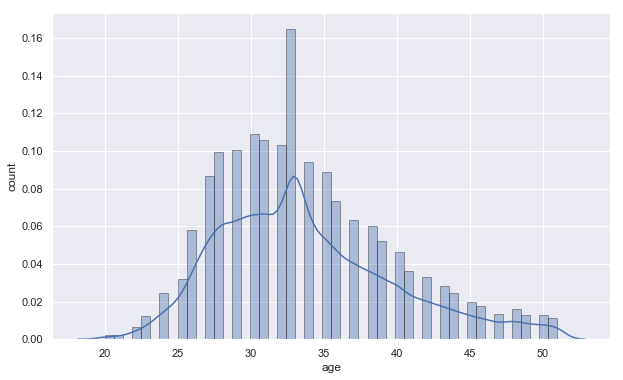

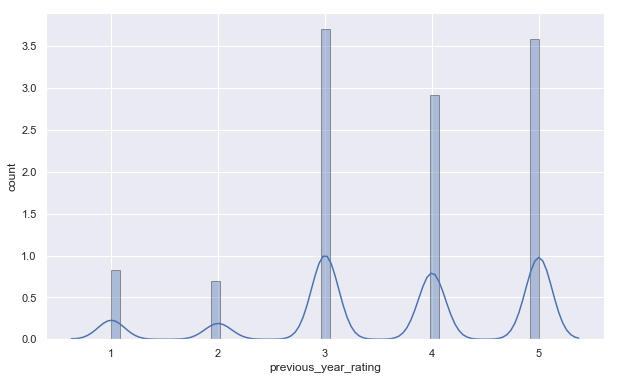

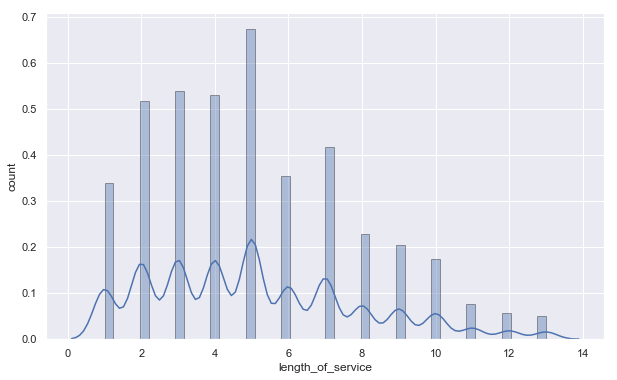

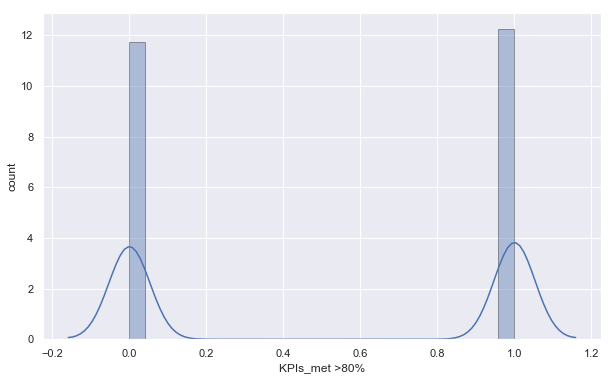

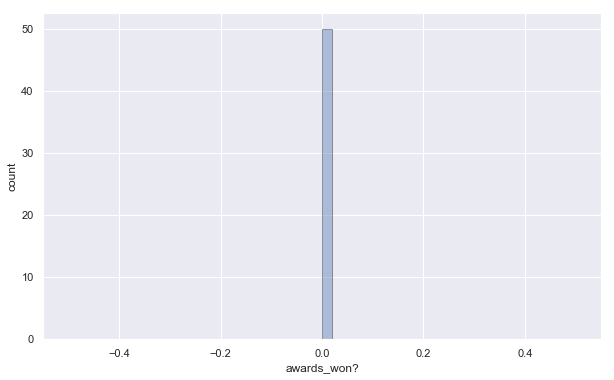

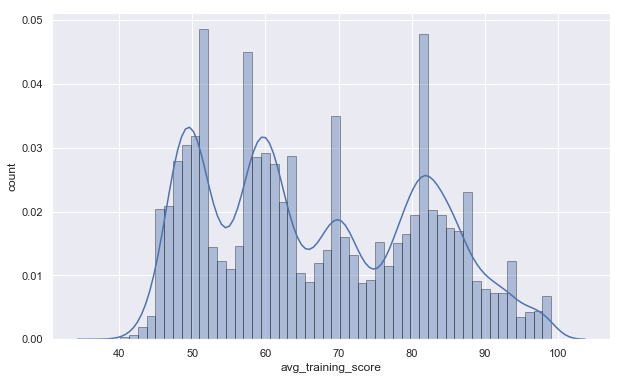

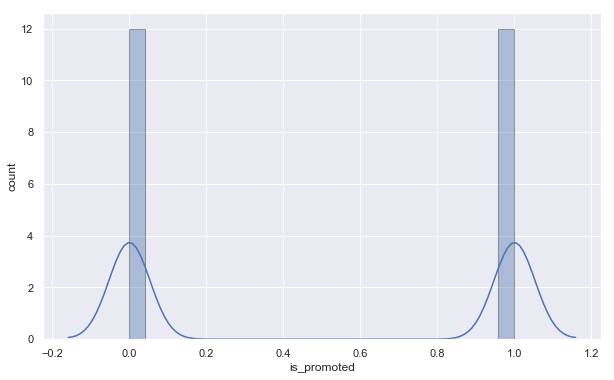

In [1584]:
#Lets check the distributions
for feature in Discrete_Numerical:
    data=df.copy()
    sns.distplot(data[feature],hist=True,hist_kws=dict(ec='k')) ##Sns wont work if there are null values in a column.
    ##data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

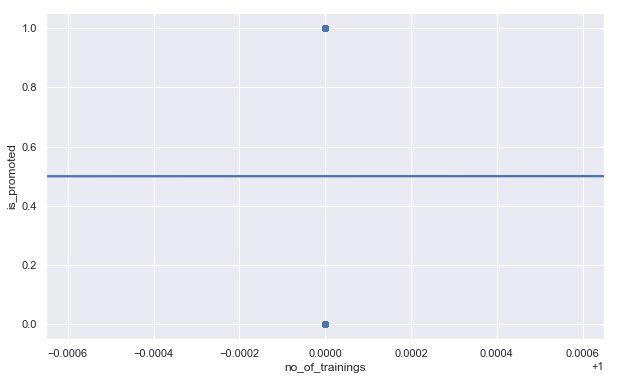

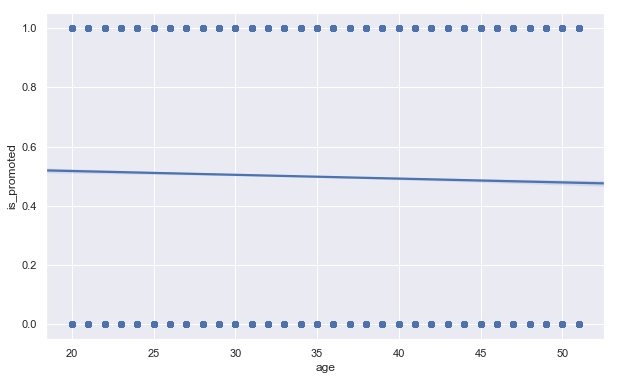

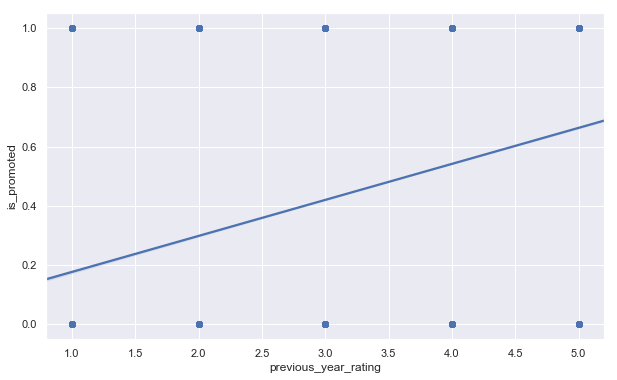

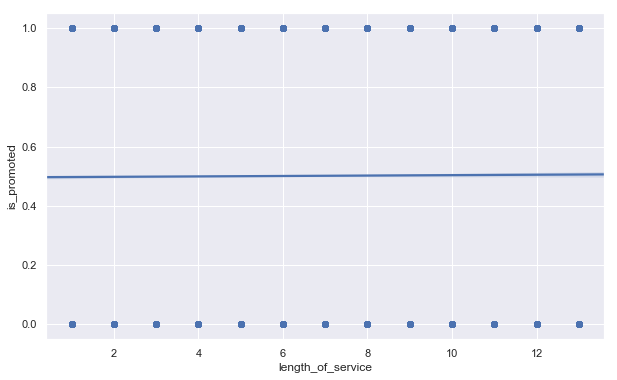

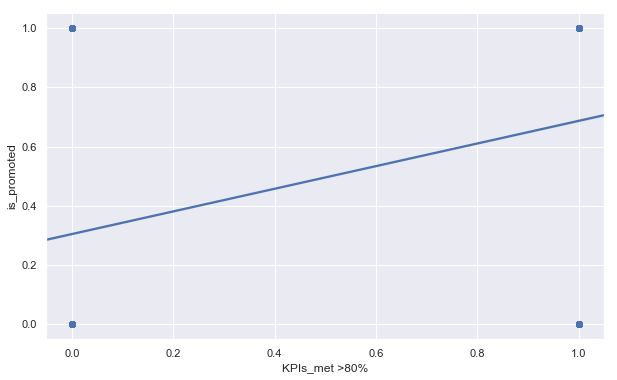

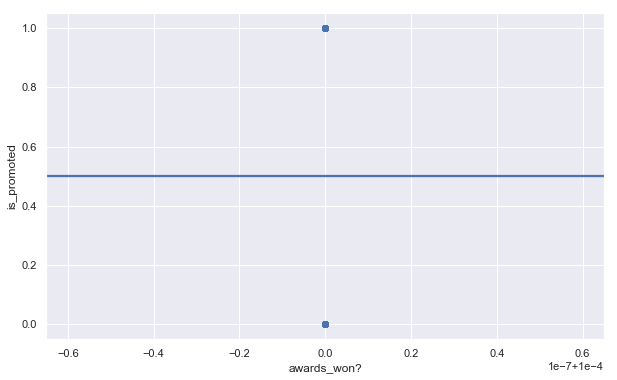

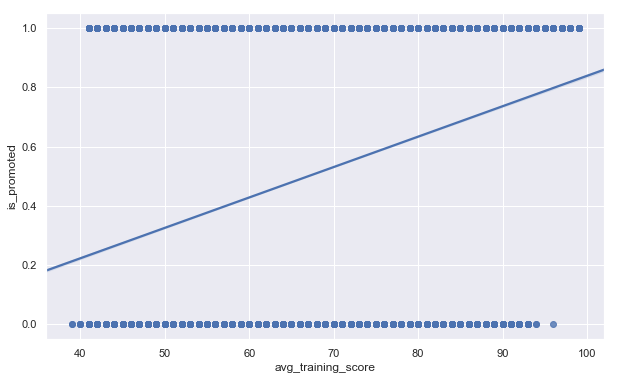

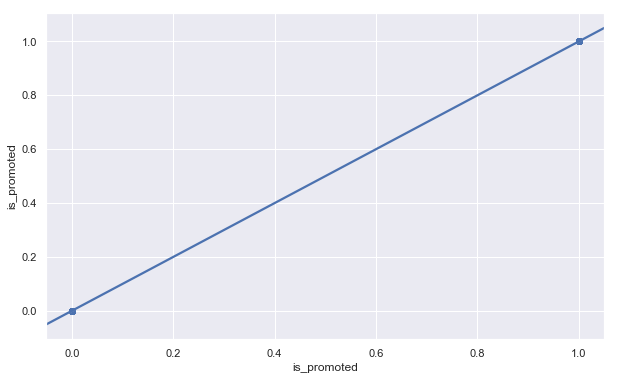

In [1585]:
#Lets see the distribution of the features wrt to target.
for feature in Discrete_Numerical:
    data=df.copy()
    sns.regplot(data[feature],data['is_promoted'])
    plt.xlabel(feature)
    plt.ylabel('is_promoted')
    plt.show()

In [1586]:
#No need of any transformation for the discrete columns if the count of the classes are more then there will be soem normal distribution.

In [1587]:
for feature in Categorical:
    data=df.copy()
    print(feature,'\n' ,data[feature].unique())

department 
 ['Sales & Marketing' 'Technology' 'Legal' 'Operations' 'Procurement'
 'Analytics' 'HR' 'Finance' 'R&D']
region 
 ['region_13' 'region_2' 'region_31' 'region_22' 'region_11' 'region_28'
 'region_7' 'region_26' 'region_8' 'region_5' 'region_4' 'region_15'
 'region_3' 'region_23' 'region_16' 'region_19' 'region_17' 'region_24'
 'region_32' 'region_25' 'region_1' 'region_30' 'region_27' 'region_6'
 'region_14' 'region_20' 'region_10' 'region_18' 'region_33' 'region_29'
 'region_21' 'region_9' 'region_34' 'region_12']
education 
 ["Master's & above" "Bachelor's" 'Below Secondary']
gender 
 ['m' 'f']
recruitment_channel 
 ['other' 'referred' 'sourcing']


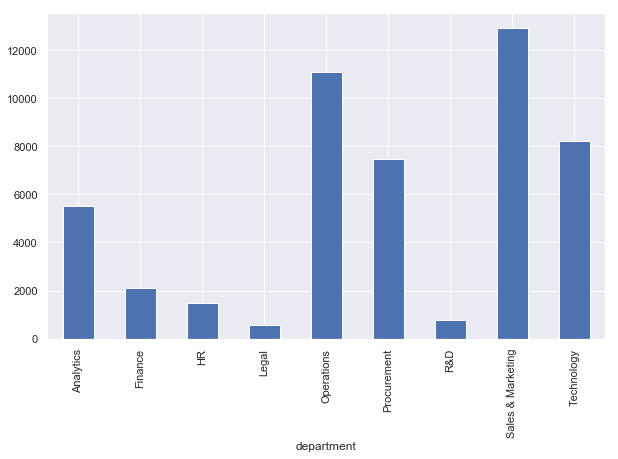

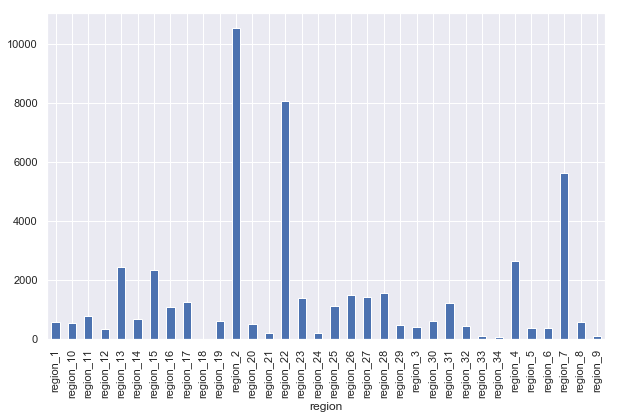

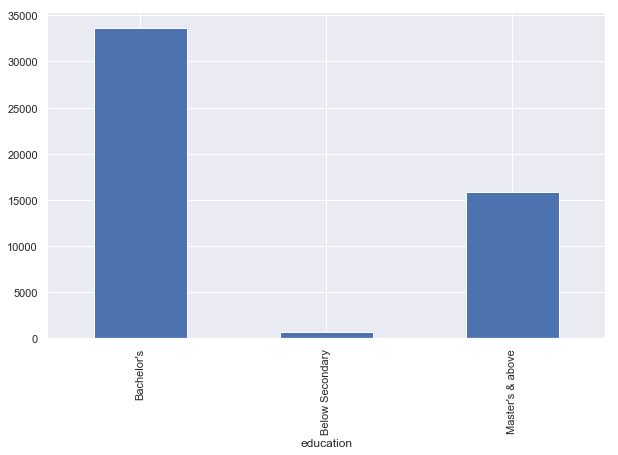

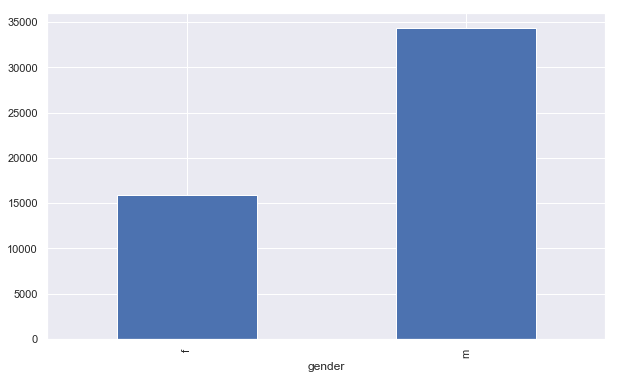

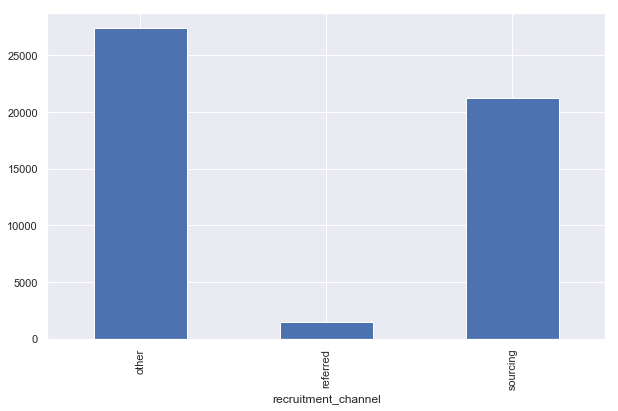

In [1588]:
#Lets visualize the distribution to see which encoding works better.
for feature in Categorical:
    data=df.copy()
    data.groupby(data[feature])['is_promoted'].sum().plot.bar()
    plt.xlabel(feature)
    plt.show()

In [1589]:
#From the above analysis, i think to ignore region as irrespective of region the candidate will get promotion or not as per his performance.
#Gender,Education,Recruitment channel they can be done One hot encoding, if we do dummies of department the complexity increases.
#Lets label encode it.

In [1590]:
##Feature extraction--Label encoding or One hot encoding
##Feature scaling-- minmax or standard scaler
##Feature tranformation--Checking the distribution of the features.
##Feature selection--correlation,Select k best

In [1591]:
##Feature extraction-Label encoding
Department={'Sales & Marketing':0,'Technology':1,'Procurement':2,'Operations':3,'Analytics':4,'R&D':5,'HR':6,'Finance':7,'Legal':8}
df['department']=df['department'].map(Department)

In [1592]:
df[Categorical].head(2)

,department,region,education,gender,recruitment_channel
0,0,region_13,Master's & above,m,other
1,1,region_2,Bachelor's,f,referred


In [1593]:
df.drop('region',axis=1,inplace=True)

In [1594]:
Categorical.remove('region')

In [1595]:
Categorical.remove('department')

In [1596]:
df=pd.get_dummies(df,columns=['education','gender','recruitment_channel'],drop_first=True)#Ues this method

In [1597]:
df.head(3)

,department,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,1.0,34.0,3.0,3.0,1.0,0.0001,49,1.0,0,1,1,0,0
1,1,1.0,37.0,5.0,4.0,1.0,0.0001,83,1.0,0,0,0,1,0
2,8,1.0,28.0,2.0,4.0,1.0,0.0001,60,1.0,0,0,1,0,1


In [1598]:
##Feature Scaling
ss=StandardScaler()
df=pd.DataFrame(ss.fit_transform(df),columns=df.columns)

In [1599]:
df.head(3)

,department,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,-1.073346,0.0,0.046980,-0.560805,-0.733547,0.978726,-1.0,-1.236521,1.0,-0.120234,1.557949,0.664212,-0.159964,-0.857606
1,-0.590374,0.0,0.543705,1.142665,-0.379230,0.978726,-1.0,1.099657,1.0,-0.120234,-0.641870,-1.505544,6.251395,-0.857606
2,2.790430,0.0,-0.946472,-1.412539,-0.379230,0.978726,-1.0,-0.480699,1.0,-0.120234,-0.641870,0.664212,-0.159964,1.166036


In [1600]:
df['KPImorethan80%']=df['KPIs_met >80%'].copy()

In [1601]:
df.drop('KPIs_met >80%',axis=1,inplace=True)

In [1602]:
df.columns

Index(['department', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'KPImorethan80%'],
      dtype='object')

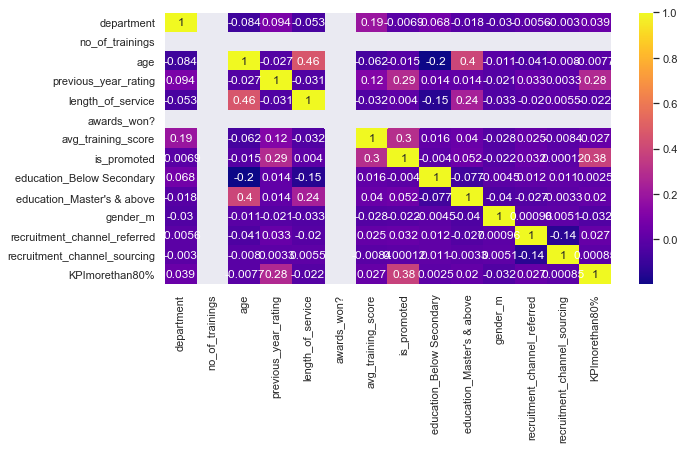

In [1603]:
##Feature selection use two methods correlation method and one more selectkbest method.
corrmatrix=df.corr()
top_correlated_features=corrmatrix.index
plt.figure(figsize=(10,5))
g=sns.heatmap(df[top_correlated_features].corr(),annot=True,cmap='plasma')

In [1604]:
df.head(2)

,department,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,KPImorethan80%
0,-1.073346,0.0,0.046980,-0.560805,-0.733547,-1.0,-1.236521,1.0,-0.120234,1.557949,0.664212,-0.159964,-0.857606,0.978726
1,-0.590374,0.0,0.543705,1.142665,-0.379230,-1.0,1.099657,1.0,-0.120234,-0.641870,-1.505544,6.251395,-0.857606,0.978726


In [1605]:
target='is_promoted'
x=df.loc[:,df.columns!=target]
y=df.loc[:,df.columns==target]

In [1606]:
from sklearn.ensemble import ExtraTreesClassifier

In [1607]:
le=LabelEncoder()
y=pd.DataFrame(le.fit_transform(y),columns=['is_promoted'])

In [1608]:
etc=ExtraTreesClassifier()
etc.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [1609]:
print(etc.feature_importances_)

[0.10724312 0.         0.16303635 0.09858787 0.1051893  0.
 0.32999338 0.0021458  0.0077069  0.01276254 0.00537218 0.01484849
 0.15311406]


In [1610]:
top_features=pd.Series(etc.feature_importances_,index=x.columns)

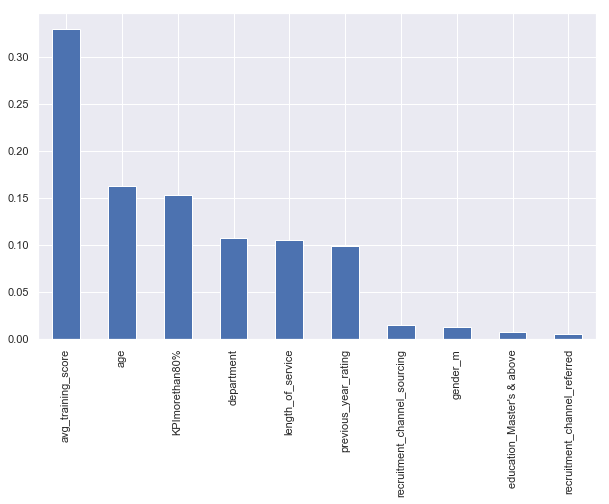

In [1611]:
top_features.nlargest(10).plot.bar()

In [1612]:
x=x[['avg_training_score','age','KPImorethan80%','length_of_service','department','previous_year_rating']]

In [1613]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [1614]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [1615]:
def generatemodelreport(y_actual,y_predicted):
    print("Accuracy = ",accuracy_score(y_test,y_pred))
    print("Precision = ",precision_score(y_test,y_pred))
    print("Recal = ",recall_score(y_test,y_pred))
    print("F1 score = ",f1_score(y_test,y_pred))
    pass

In [1616]:
generatemodelreport(y_test,y_pred)

Accuracy =  0.7180893498205025
Precision =  0.7117188271300227
Recal =  0.7250326863119783
F1 score =  0.7183140693503387


In [1630]:
def generate_auc_roc_curve(LR,x_test):
    y_pred_proba=LR.predict_proba(x_test)[:,1]
    print(y_pred_proba.shape)
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
    auc=roc_auc_score(y_test,y_pred_proba)
    plt.plot(fpr,tpr,label='AUC ROC crve with area under the curve='+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

(20056,)


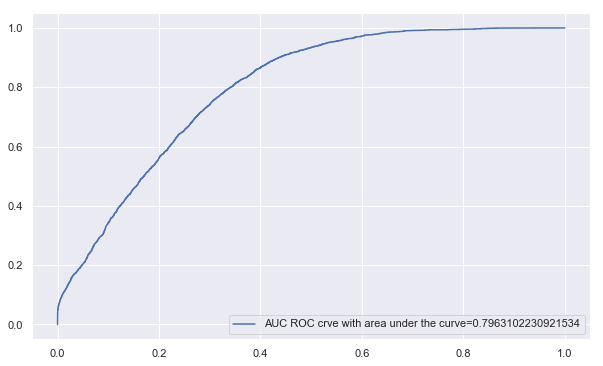

In [1631]:
generate_auc_roc_curve(LR,x_test)

In [1623]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7193, 2920],
       [2734, 7209]], dtype=int64)

In [1624]:
pred_proba_df = pd.DataFrame(LR.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.4981551655364978
[[   48 10065]
 [    0  9943]]

******** For i = 0.1 ******
Our testing accuracy is 0.548613881132828
[[1061 9052]
 [   1 9942]]

******** For i = 0.15 ******
Our testing accuracy is 0.6016154766653371
[[2175 7938]
 [  52 9891]]

******** For i = 0.2 ******
Our testing accuracy is 0.6606003191065017
[[3442 6671]
 [ 136 9807]]

******** For i = 0.25 ******
Our testing accuracy is 0.6931092939768648
[[4318 5795]
 [ 360 9583]]

******** For i = 0.3 ******
Our testing accuracy is 0.7166433984842441
[[5114 4999]
 [ 684 9259]]

******** For i = 0.35 ******
Our testing accuracy is 0.7294076585560431
[[5651 4462]
 [ 965 8978]]

******** For i = 0.4 ******
Our testing accuracy is 0.7324990027921819
[[6110 4003]
 [1362 8581]]

******** For i = 0.45 ******
Our testing accuracy is 0.7288093338651775
[[6652 3461]
 [1978 7965]]

******** For i = 0.5 ******
Our testing accuracy is 0.7180893498205025
[[7193 2920]
 [2734 7209]]

*

##Lets work using class_weight='balanced' method.

Every class in a target variable is assigned a weight.
Wj=n/knJ    Wj=Weight for each class
n=Total no of observation
k=Total no of classes
nj=Total no of observation in each class.

For minority classes Wj is High and for majority classes Wj is low.

In [1646]:
unique_classes=list(y[target].unique())
unique_classes

[1, 0]

In [1647]:
df.loc[df[target]==classes].shape[0]

50140

In [1649]:
out_dict={}
for classes in unique_classes:
    out_dict[classes]=y.shape[0]/((y.loc[y[target]==classes].shape[0])*len(unique_classes))

In [1650]:
out_dict

{1: 1.0, 0: 1.0}

In [1652]:
LR=LogisticRegression(class_weight='balanced').fit(x_train,y_train)
from sklearn.utils import class_weight

In [1653]:
class_weight.compute_class_weight('balanced',np.unique(y_train),y_train[target])

array([1.00212357, 0.99788541])

In [ ]:
##Like this we can think of class_weight method, and also we can do grid search on this to increase the model performance.

In [1659]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.71      0.72     10113
     class 1       0.71      0.73      0.72      9943

    accuracy                           0.72     20056
   macro avg       0.72      0.72      0.72     20056
weighted avg       0.72      0.72      0.72     20056



In [1660]:
#Summary:- What ever the accuarcy we get, the precision, recall and f2 score should always be high, near to 1.
#AUC ahould be one. Always the bvinary classifier uses threshold value of 0.5 and also you check the accuracies at different thresholds.

In [17]:
sklearn. __version__

'0.24.1'

In [9]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\HR analytics\train_LZdllcl.csv")

In [10]:
y_train=df[['is_promoted']]

In [11]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([50140,  4668], dtype=int64))

In [12]:
unique,count=np.unique(y_train,return_counts=True)
y_train_counts={k:v for k,v in zip(unique,count)}
y_train_counts

{0: 50140, 1: 4668}

In [15]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=10,ratio=1)

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (D:\Python\Anaconda\lib\site-packages\sklearn\utils\__init__.py)

In [29]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
print(features)
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=10,shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

[('pca', PCA(n_components=3)), ('select_best', SelectKBest(k=6))]
0.764354066985646
